In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
datafile = '/nfs/spare11/env315/data/era5_s111600.nc'
data = xr.open_dataset(datafile).compute()
data

0
1
2
3
5


/knight/mamba_aug23/envs/aug23_env/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gribberish' loading failed:
No module named 'gribberish'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (valid_time: 16, latitude: 102, longitude: 233)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-16 2025-11-17 ... 2025-12-01
    number      int64 0
  * latitude    (latitude) float64 49.5 49.25 49.0 48.75 ... 24.75 24.5 24.25
  * longitude   (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver      <U4 '0005'
Data variables:
    speed10     (valid_time, latitude, longitude) float32 0.4355 ... 3.971
    t2m         (valid_time, latitude, longitude) float32 280.7 281.6 ... 299.0
    msl         (valid_time, latitude, longitude) float32 1.013e+05 ... 1.018...
    tp          (valid_time, latitude, longitude) float32 0.004708 ... 0.003186
    tcw         (valid_time, latitude, longitude) float32 17.05 17.07 ... 39.45
    d2m         (valid_time, latitude, longitude) float32 280.1 280.6 ... 295.0

In [5]:
var1 = data.t2m
var1

<xarray.DataArray 't2m' (valid_time: 16, latitude: 102, longitude: 233)>
array([[[280.7433 , 281.59485, 282.34094, ..., 271.49524, 272.73743,
         274.13586],
        [280.99915, 281.52063, 281.1847 , ..., 273.2804 , 274.20422,
         273.9093 ],
        [282.4171 , 281.3722 , 280.41907, ..., 273.50305, 273.0714 ,
         272.50305],
        ...,
        [294.55188, 294.51477, 294.45813, ..., 297.755  , 297.7472 ,
         297.85266],
        [294.44836, 294.39172, 294.30188, ..., 297.7296 , 297.71985,
         297.83118],
        [294.39563, 294.33118, 294.26086, ..., 297.74524, 297.75696,
         297.87805]],

       [[282.66205, 283.29877, 283.65814, ..., 273.9394 , 275.00775,
         276.22455],
        [282.5351 , 283.02924, 282.90033, ..., 275.34955, 276.08978,
         275.8183 ],
        [282.86127, 282.17572, 281.5722 , ..., 275.164  , 274.6093 ,
         274.0605 ],
...
        [292.35114, 292.33356, 292.3062 , ..., 299.40973, 299.3648 ,
         299.30035],
        [292.4273 , 292.40778, 292.40973, ..., 299.5191 , 299.46442,
         299.37457],
        [292.68512, 292.54254, 292.50934, ..., 299.57965, 299.5113 ,
         299.43903]],

       [[277.71964, 278.26456, 278.96182, ..., 269.95987, 270.9716 ,
         272.26456],
        [278.08487, 278.17276, 277.33096, ..., 271.87393, 272.42862,
         271.89542],
        [279.0497 , 277.39346, 275.8759 , ..., 271.98526, 271.2919 ,
         270.4755 ],
        ...,
        [292.48135, 292.52432, 292.49307, ..., 298.80167, 298.75674,
         298.74698],
        [292.55362, 292.579  , 292.55362, ..., 298.9423 , 298.8837 ,
         298.88565],
        [292.67276, 292.68253, 292.67276, ..., 298.8876 , 298.87393,
         298.95792]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-16 2025-11-17 ... 2025-12-01
    number      int64 0
  * latitude    (latitude) float64 49.5 49.25 49.0 48.75 ... 24.75 24.5 24.25
  * longitude   (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [18]:
lon = data.longitude
lon

<xarray.DataArray 'longitude' (longitude: 233)>
array([-125.  , -124.75, -124.5 , ...,  -67.5 ,  -67.25,  -67.  ])
Coordinates:
    number     int64 0
  * longitude  (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver     <U4 '0005'

In [7]:
lon = var1.longitude
lon

<xarray.DataArray 'longitude' (longitude: 233)>
array([-125.  , -124.75, -124.5 , ...,  -67.5 ,  -67.25,  -67.  ])
Coordinates:
    number     int64 0
  * longitude  (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver     <U4 '0005'

In [8]:
var1 = data.t2m.values
print(type(var1),var1.shape)

<class 'numpy.ndarray'> (16, 102, 233)


In [9]:
var1 = data.t2m
t2m_nyc = var1.sel(latitude=40.75,longitude=-74.0)
t2m_nyc

<xarray.DataArray 't2m' (valid_time: 16)>
array([282.59094, 279.9179 , 278.98383, 279.61353, 278.95898, 278.3468 ,
       282.46613, 280.32495, 280.43878, 278.89795, 283.64624, 285.3228 ,
       278.0565 , 276.9867 , 275.9527 , 278.88565], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-16 2025-11-17 ... 2025-12-01
    number      int64 0
    latitude    float64 40.75
    longitude   float64 -74.0
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [10]:
t2m_nys = var1.sel(latitude=slice(45.0,40.25),longitude=slice(-79.5,-71.5))
t2m_nys

<xarray.DataArray 't2m' (valid_time: 16, latitude: 20, longitude: 33)>
array([[[274.67493, 274.14954, 273.65735, ..., 270.77454, 270.64172,
         270.25305],
        [275.28625, 274.5675 , 273.84485, ..., 271.55774, 271.16125,
         270.58118],
        [276.9171 , 275.1964 , 274.4308 , ..., 272.40344, 271.07727,
         270.44055],
        ...,
        [288.93665, 288.58704, 288.14563, ..., 282.67883, 282.5675 ,
         282.44446],
        [289.2921 , 288.71985, 288.13977, ..., 282.8058 , 282.7433 ,
         282.62024],
        [289.1671 , 288.22375, 287.69446, ..., 283.0304 , 283.04016,
         282.92102]],

       [[272.22845, 271.5019 , 271.05072, ..., 271.15814, 270.69135,
         269.97455],
        [272.3515 , 271.8515 , 271.49213, ..., 271.21088, 270.96088,
         270.48236],
        [272.99408, 272.289  , 271.9511 , ..., 272.19525, 271.3144 ,
         270.76166],
...
        [273.40387, 273.40778, 273.14606, ..., 279.15778, 279.24567,
         279.3648 ],
        [274.0699 , 273.9488 , 273.3824 , ..., 279.4234 , 279.59137,
         279.7105 ],
        [274.4937 , 273.95465, 273.34918, ..., 279.5777 , 279.79645,
         279.82965]],

       [[272.06143, 272.27042, 272.454  , ..., 273.43643, 273.11807,
         272.71378],
        [272.28018, 272.71378, 273.02042, ..., 273.37784, 273.0634 ,
         272.54776],
        [272.77237, 273.0673 , 273.37003, ..., 274.12003, 273.72354,
         273.15518],
        ...,
        [272.3837 , 272.1669 , 271.74112, ..., 285.7587 , 286.08682,
         286.08096],
        [272.71768, 272.2509 , 271.55753, ..., 286.20987, 286.17667,
         286.16885],
        [272.4501 , 271.4794 , 270.8505 , ..., 286.2333 , 286.18253,
         286.24698]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-16 2025-11-17 ... 2025-12-01
    number      int64 0
  * latitude    (latitude) float64 45.0 44.75 44.5 44.25 ... 40.75 40.5 40.25
  * longitude   (longitude) float64 -79.5 -79.25 -79.0 ... -72.0 -71.75 -71.5
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [11]:
t2m_day = var1.sel(valid_time='2025-12-01')
t2m_day

<xarray.DataArray 't2m' (latitude: 102, longitude: 233)>
array([[277.71964, 278.26456, 278.96182, ..., 269.95987, 270.9716 ,
        272.26456],
       [278.08487, 278.17276, 277.33096, ..., 271.87393, 272.42862,
        271.89542],
       [279.0497 , 277.39346, 275.8759 , ..., 271.98526, 271.2919 ,
        270.4755 ],
       ...,
       [292.48135, 292.52432, 292.49307, ..., 298.80167, 298.75674,
        298.74698],
       [292.55362, 292.579  , 292.55362, ..., 298.9423 , 298.8837 ,
        298.88565],
       [292.67276, 292.68253, 292.67276, ..., 298.8876 , 298.87393,
        298.95792]], dtype=float32)
Coordinates:
    valid_time  datetime64[ns] 2025-12-01
    number      int64 0
  * latitude    (latitude) float64 49.5 49.25 49.0 48.75 ... 24.75 24.5 24.25
  * longitude   (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [12]:
t2m_day = var1.sel(valid_time=slice('2025-11-21','2025-11-30'))
t2m_day

<xarray.DataArray 't2m' (valid_time: 10, latitude: 102, longitude: 233)>
array([[[280.41907, 281.53625, 282.09094, ..., 271.46594, 272.9093 ,
         274.64954],
        [279.82532, 280.95227, 280.87415, ..., 273.80383, 274.73938,
         274.03235],
        [280.714  , 279.60852, 278.7179 , ..., 273.77844, 272.89368,
         271.6593 ],
        ...,
        [293.16516, 293.25305, 293.39368, ..., 298.26868, 298.1671 ,
         298.09485],
        [293.37415, 293.49915, 293.69446, ..., 298.32336, 298.255  ,
         298.17688],
        [293.66125, 293.79797, 293.9718 , ..., 298.38586, 298.33704,
         298.29993]],

       [[282.56378, 282.6751 , 282.51105, ..., 273.2669 , 274.24738,
         275.3333 ],
        [282.5755 , 282.67902, 282.2962 , ..., 274.71027, 275.47394,
         275.2884 ],
        [282.83527, 281.8587 , 281.05402, ..., 274.93292, 274.57355,
         274.08917],
...
        [293.057  , 293.05505, 293.0277 , ..., 299.40662, 299.38318,
         299.42615],
        [293.09216, 293.08826, 293.11365, ..., 299.6117 , 299.69763,
         299.7367 ],
        [292.9945 , 293.10583, 293.21716, ..., 299.81287, 299.88904,
         299.90662]],

       [[276.94293, 277.7906 , 278.51715, ..., 268.2574 , 269.7437 ,
         271.46637],
        [276.8199 , 277.34332, 276.77692, ..., 270.7281 , 271.8355 ,
         271.5816 ],
        [277.9781 , 276.34723, 274.97614, ..., 271.4488 , 270.90192,
         270.28082],
        ...,
        [292.35114, 292.33356, 292.3062 , ..., 299.40973, 299.3648 ,
         299.30035],
        [292.4273 , 292.40778, 292.40973, ..., 299.5191 , 299.46442,
         299.37457],
        [292.68512, 292.54254, 292.50934, ..., 299.57965, 299.5113 ,
         299.43903]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-21 2025-11-22 ... 2025-11-30
    number      int64 0
  * latitude    (latitude) float64 49.5 49.25 49.0 48.75 ... 24.75 24.5 24.25
  * longitude   (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [13]:
t2m_day = var1.sel(valid_time=var1.valid_time.dt.month == 11)
t2m_day

<xarray.DataArray 't2m' (valid_time: 15, latitude: 102, longitude: 233)>
array([[[280.7433 , 281.59485, 282.34094, ..., 271.49524, 272.73743,
         274.13586],
        [280.99915, 281.52063, 281.1847 , ..., 273.2804 , 274.20422,
         273.9093 ],
        [282.4171 , 281.3722 , 280.41907, ..., 273.50305, 273.0714 ,
         272.50305],
        ...,
        [294.55188, 294.51477, 294.45813, ..., 297.755  , 297.7472 ,
         297.85266],
        [294.44836, 294.39172, 294.30188, ..., 297.7296 , 297.71985,
         297.83118],
        [294.39563, 294.33118, 294.26086, ..., 297.74524, 297.75696,
         297.87805]],

       [[282.66205, 283.29877, 283.65814, ..., 273.9394 , 275.00775,
         276.22455],
        [282.5351 , 283.02924, 282.90033, ..., 275.34955, 276.08978,
         275.8183 ],
        [282.86127, 282.17572, 281.5722 , ..., 275.164  , 274.6093 ,
         274.0605 ],
...
        [293.057  , 293.05505, 293.0277 , ..., 299.40662, 299.38318,
         299.42615],
        [293.09216, 293.08826, 293.11365, ..., 299.6117 , 299.69763,
         299.7367 ],
        [292.9945 , 293.10583, 293.21716, ..., 299.81287, 299.88904,
         299.90662]],

       [[276.94293, 277.7906 , 278.51715, ..., 268.2574 , 269.7437 ,
         271.46637],
        [276.8199 , 277.34332, 276.77692, ..., 270.7281 , 271.8355 ,
         271.5816 ],
        [277.9781 , 276.34723, 274.97614, ..., 271.4488 , 270.90192,
         270.28082],
        ...,
        [292.35114, 292.33356, 292.3062 , ..., 299.40973, 299.3648 ,
         299.30035],
        [292.4273 , 292.40778, 292.40973, ..., 299.5191 , 299.46442,
         299.37457],
        [292.68512, 292.54254, 292.50934, ..., 299.57965, 299.5113 ,
         299.43903]]], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2025-11-16 2025-11-17 ... 2025-11-30
    number      int64 0
  * latitude    (latitude) float64 49.5 49.25 49.0 48.75 ... 24.75 24.5 24.25
  * longitude   (longitude) float64 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
    expver      <U4 '0005'
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

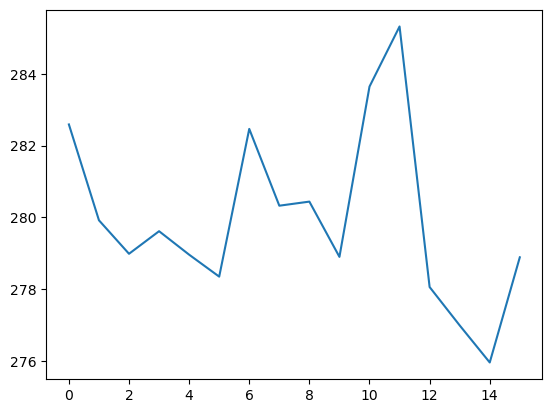

In [14]:
plt.plot(t2m_nyc)

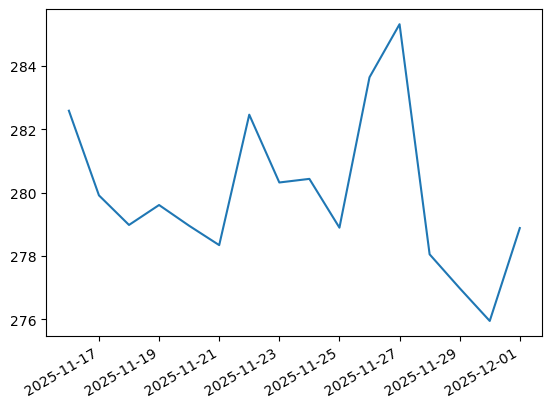

In [16]:
plt.plot(t2m_nyc.valid_time, t2m_nyc)
plt.gcf().autofmt_xdate()

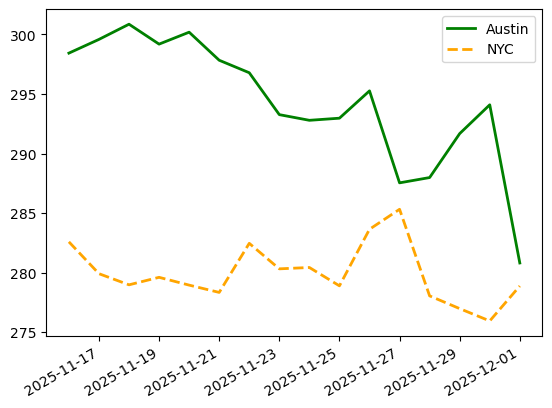

In [27]:
t2m_austin = var1.sel(latitude=30.25,longitude=-97.75)
plt.plot(t2m_austin.valid_time, t2m_austin, color='green',linewidth=2,label='Austin') #linestyle='dashed',
plt.plot(t2m_nyc.valid_time, t2m_nyc, color='orange',linestyle='dashed', linewidth=2,label='NYC')
plt.gcf().autofmt_xdate()
plt.legend()